In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('/content/Telecom-Customer-Churn - Telecom-Customer-Churn.csv')


In [12]:
# Check for missing values
print(df.isnull().sum())

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)



customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [13]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f'Duplicate records: {duplicates}')

# Remove duplicates
df.drop_duplicates(inplace=True)


Duplicate records: 0


In [14]:
df['gender'] = df['gender'].str.lower()

print(df['gender'].unique())


['female' 'male']


In [15]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0})
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0})
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [16]:
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['MonthlyCharges'] >= lower_bound) & (df['MonthlyCharges'] <= upper_bound)]


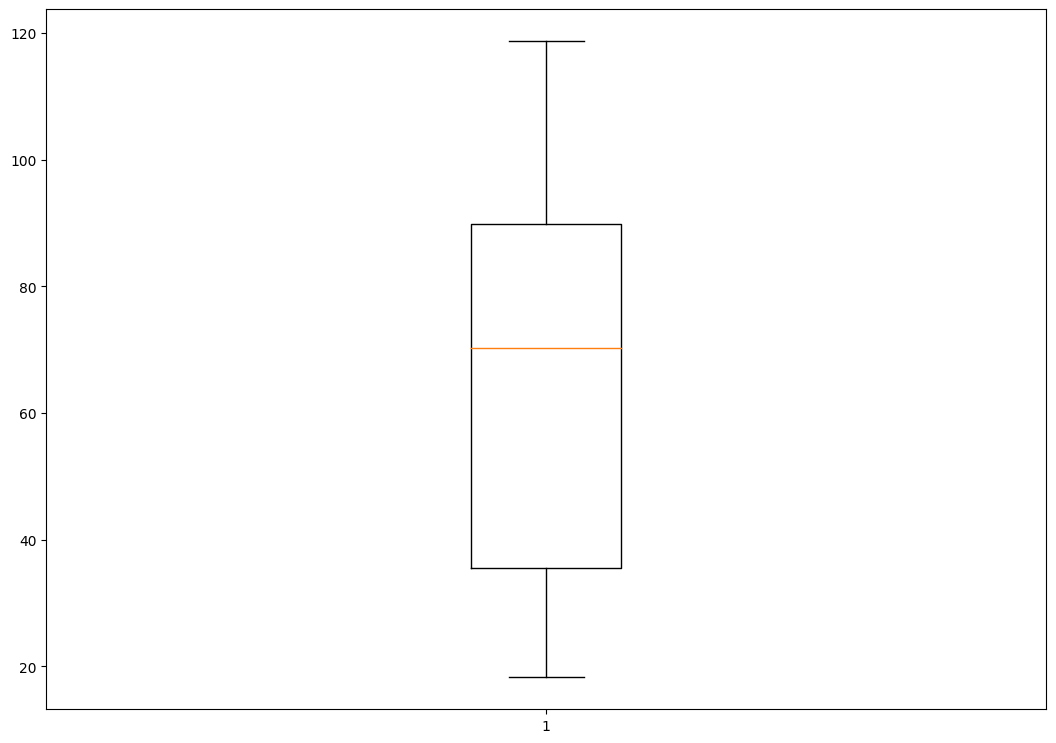

In [17]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(df['MonthlyCharges'])
plt.show()

In [18]:
# Create new features
df['TenureYears'] = df['tenure'] / 12
df['HighMonthlyCharges'] = (df['MonthlyCharges'] > df['MonthlyCharges'].median()).astype(int)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['MonthlyCharges', 'TotalCharges', 'TenureYears']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges', 'TenureYears']])


In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Export the cleaned dataset
df.to_csv('Cleaned_Telecom_Customer_Churn.csv', index=False)


In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureYears,HighMonthlyCharges
0,7590-VHVEG,female,0,1,0,1,0,No phone service,DSL,0.0,...,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0,0.083333,0
1,5575-GNVDE,male,0,0,0,34,1,No,DSL,1.0,...,0.0,0.0,One year,0,Mailed check,56.95,1889.50,0,2.833333,0
2,3668-QPYBK,male,0,0,0,2,1,No,DSL,1.0,...,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1,0.166667,0
3,7795-CFOCW,male,0,0,0,45,0,No phone service,DSL,1.0,...,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0,3.750000,0
4,9237-HQITU,female,0,0,0,2,1,No,Fiber optic,0.0,...,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1,0.166667,1
